# Importing Modules
- logistic regression
- knn
- decision tree
- random forest
- xgboosting
- adaboosting
- voting
- gbm
- light gbm
- catboosting

In [1]:
# Basic & visualization modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn modules
from sklearn import tree
from sklearn.preprocessing import LabelEncoder as le                    # label encoder
from sklearn.model_selection import train_test_split                    # train & test split 
from sklearn.preprocessing import RobustScaler as rbScaler              # robust scaler
from sklearn.ensemble import VotingClassifier as voClassifier           # voting
from sklearn.tree  import DecisionTreeClassifier as dtClassifier        # decision tree
from sklearn.ensemble import AdaBoostClassifier as adabClassifier       # adaboosting
from sklearn.neighbors import KNeighborsClassifier as knnClassifier     # knn
from sklearn.ensemble import RandomForestClassifier as rfClassifier     # random forest
from sklearn.linear_model import LogisticRegression as lgrClassifier    # logistic regression
from sklearn.ensemble import GradientBoostingClassifier as gbClassifier # gbm

# Independent modules
from lightgbm import LGBMClassifier as lgbClassifier                    # light gbm
from xgboost import XGBClassifier                                       # xgboosting
from catboost import CatBoostClassifier as cbClassifier                 # catboosting

# Reading the CSV file

In [2]:
data = pd.read_csv("../input/credit-score-classification/train.csv", encoding = "utf-8" , sep = ",", low_memory=False)

# Displaying the Data

In [3]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


# Summary

- ID: Represents a unique identification of an entry
- Customer_ID: Represents a unique identification of a person
- Month: Represents the month of the year
- Name: Represents the name of a person
- Age: Represents the age of the person
- SSN: Represents the social security number of a person
- Occupation: Represents the occupation of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts: Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Type_of_Loan: Represents the types of loan taken by a person
- Delay_from_due_date: Represents the average number of days delayed from the payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments (in USD)
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Payment_Behaviour: Represents the payment behavior of the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

# Exploring Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
data.describe(include="object")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [7]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<AxesSubplot:>

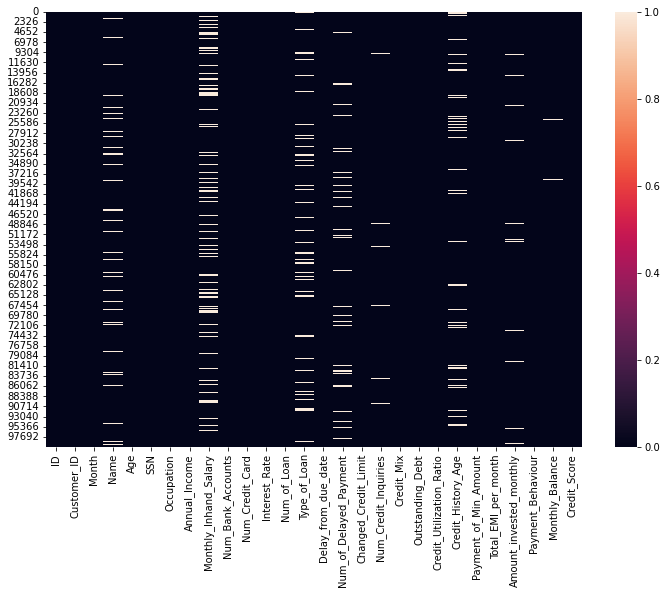

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

In [9]:
numCols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Credit_Utilization_Ratio']

<Figure size 1296x432 with 0 Axes>

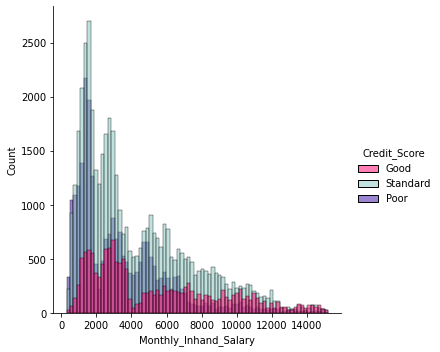

<Figure size 1296x432 with 0 Axes>

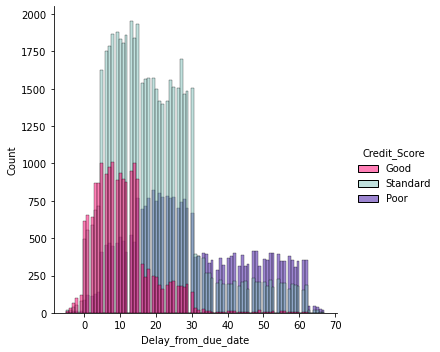

<Figure size 1296x432 with 0 Axes>

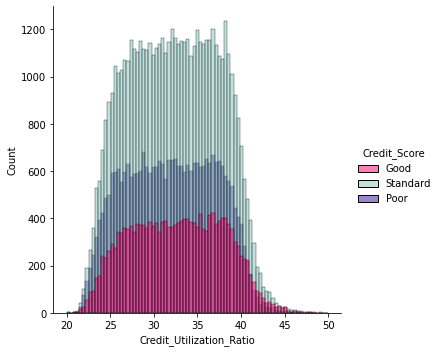

In [10]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=data, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

In [11]:
objCols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

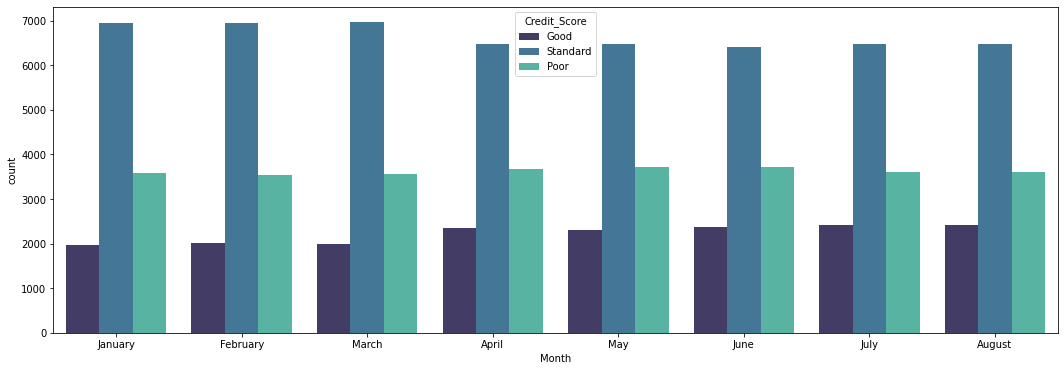

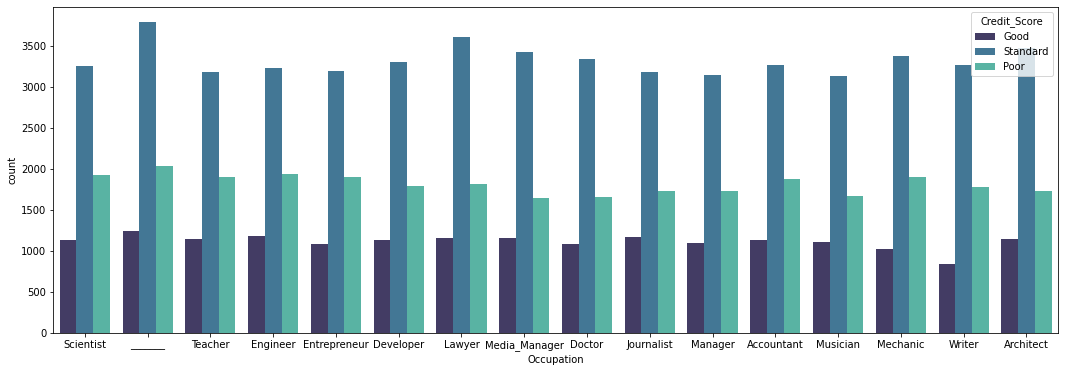

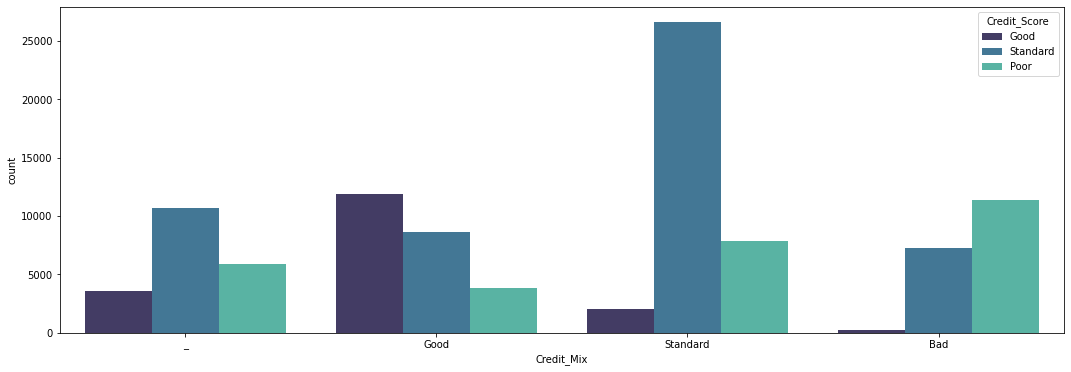

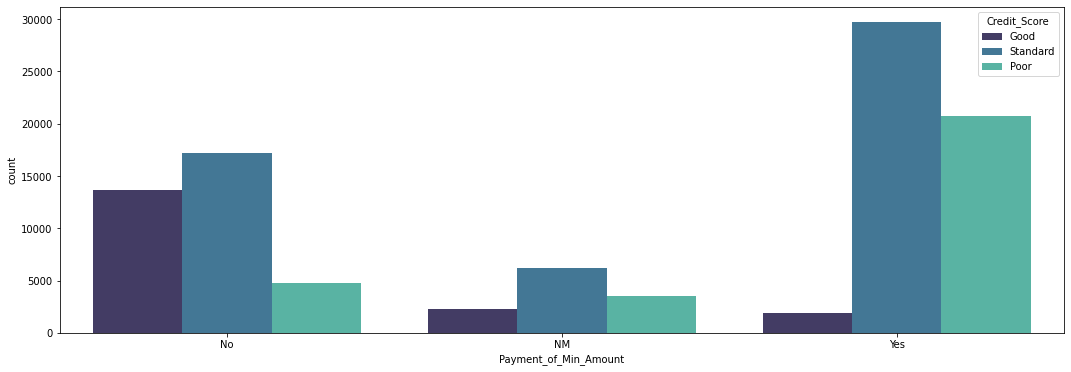

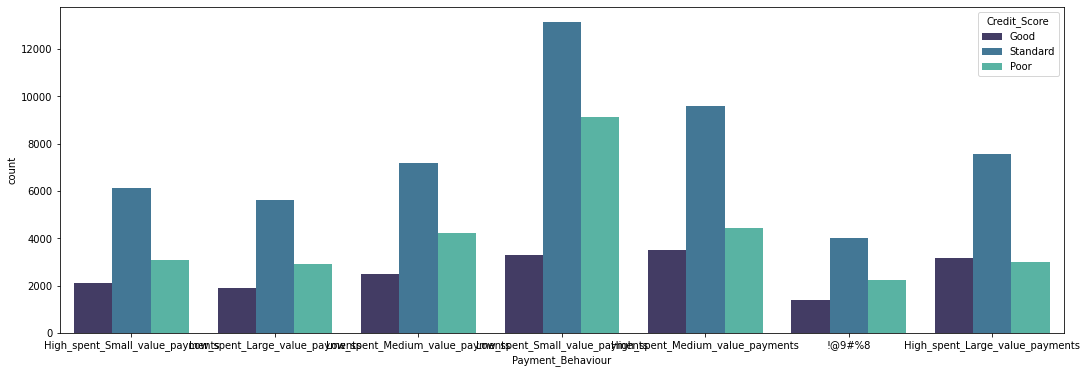

In [12]:
for col in objCols:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=data, palette="mako", hue="Credit_Score")
    plt.show()

In [13]:
rows = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
pd.set_option('mode.chained_assignment',None)

In [14]:
for row in rows:
    data[row] = data[row].str.replace(r'_+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [15]:
for row in rows:
    data[row] = pd.to_numeric(data[row], errors='coerce')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

# Handle missing values

In [17]:
data.dropna(thresh=26, inplace=True)

In [18]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9153
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13877
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10507
Delay_from_due_date             0
Num_of_Delayed_Payment       6317
Changed_Credit_Limit         1846
Num_Credit_Inquiries         1749
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8227
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3997
Payment_Behaviour               0
Monthly_Balance              1098
Credit_Score                    0
dtype: int64

## 1,744 missing Rows were removed to handle some missing values 1.7%

In [19]:
data = data[['Month', 'Age', 'Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']]

<AxesSubplot:>

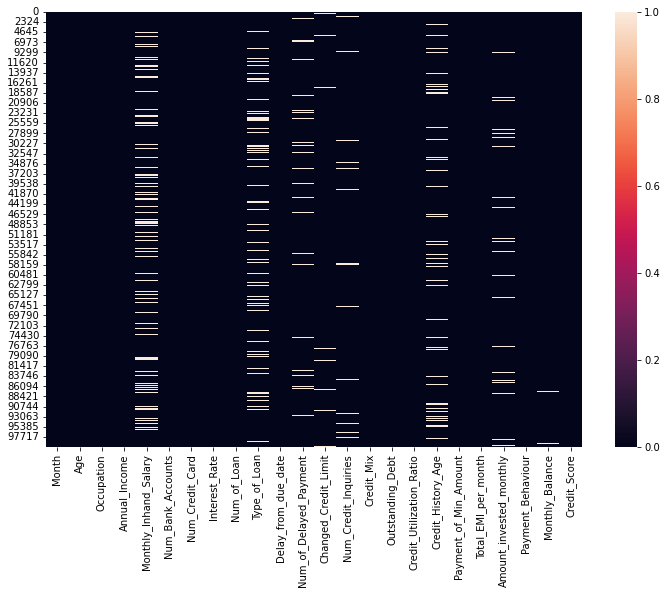

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

## Handle Monthly_Inhand_Salary missing values

<Figure size 864x576 with 0 Axes>

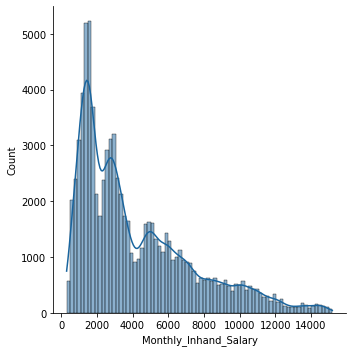

In [21]:
plt.figure(figsize=(12,8))
sns.displot(data=data, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

In [22]:
fill_list = data['Monthly_Inhand_Salary'].dropna().tolist()
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

<Figure size 864x576 with 0 Axes>

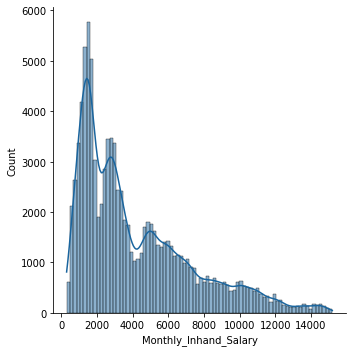

In [23]:
plt.figure(figsize=(12,8))
sns.displot(data=data, x="Monthly_Inhand_Salary", kde=True, color="#1a659e")

## Handle Type_of_Loan missing values

In [24]:
fill_list = data['Type_of_Loan'].dropna().tolist()
data['Type_of_Loan'] = data['Type_of_Loan'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Num_of_Delayed_Payment missing values

In [25]:
fill_list = data['Num_of_Delayed_Payment'].dropna().tolist()
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Changed_Credit_Limit missing values

In [26]:
fill_list = data['Changed_Credit_Limit'].dropna().tolist()
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Num_Credit_Inquiries missing values

In [27]:
fill_list = data['Num_Credit_Inquiries'].dropna().tolist()
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Credit_History_Age missing values

In [28]:
fill_list = data['Credit_History_Age'].dropna().tolist()
data['Credit_History_Age'] = data['Credit_History_Age'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Amount_invested_monthly missing values

In [29]:
fill_list = data['Amount_invested_monthly'].dropna().tolist()
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

## Handle Monthly_Balance missing values

In [30]:
fill_list = data['Monthly_Balance'].dropna().tolist()
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

<AxesSubplot:>

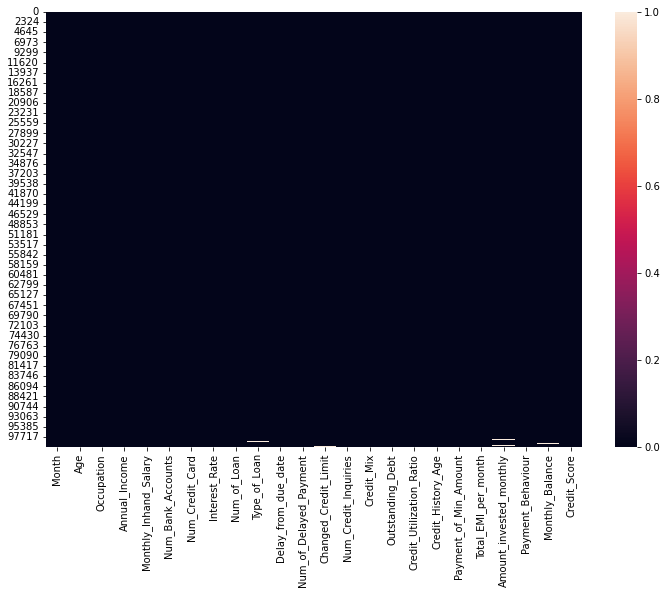

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())

In [32]:
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
2,March,-500,Scientist,19114.12,2830.870833,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,9162.597500,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23,Scientist,19114.12,1226.791667,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [33]:
data.dropna(thresh=24, inplace=True)

In [34]:
data.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [35]:
data.shape

(97514, 24)

## 2486 missing Rows were removed to handle some outliers 2.5%

# Handle Outliers Values

In [36]:
numCols = data.select_dtypes([np.number]).columns

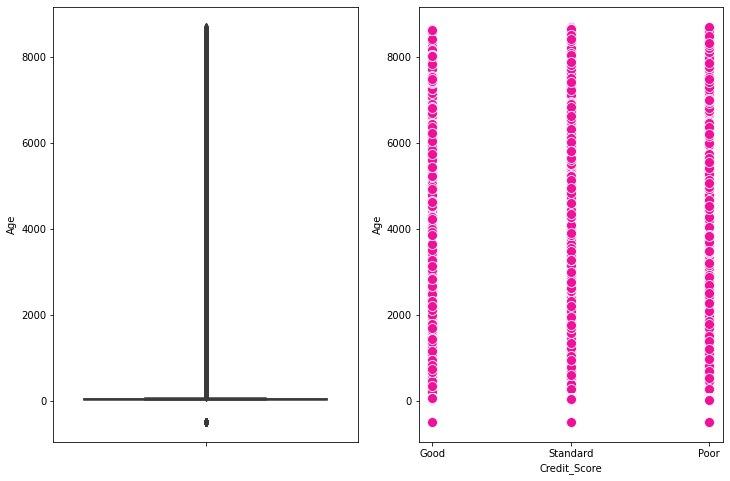

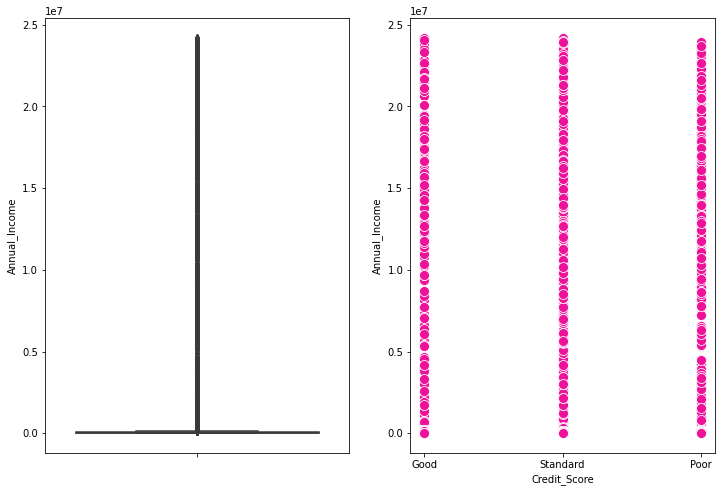

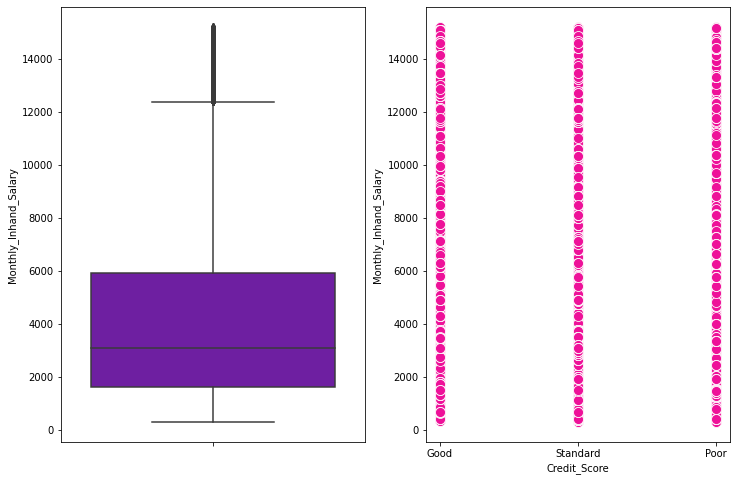

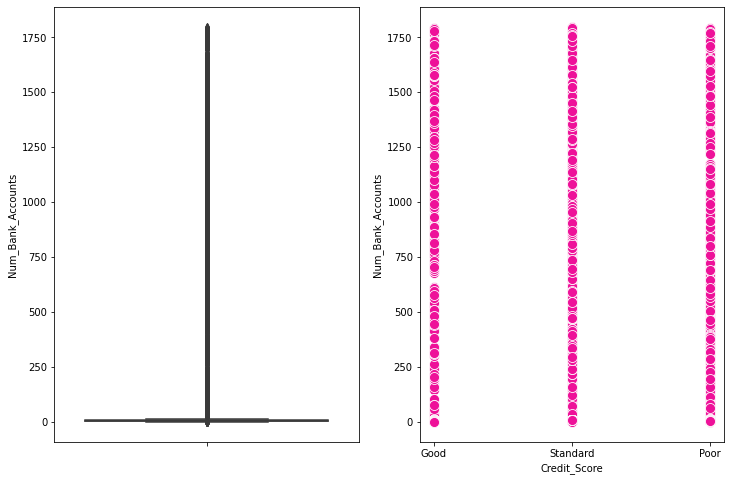

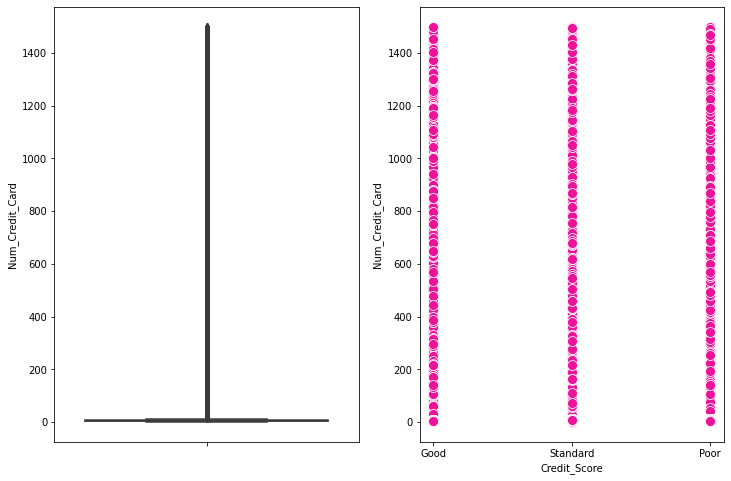

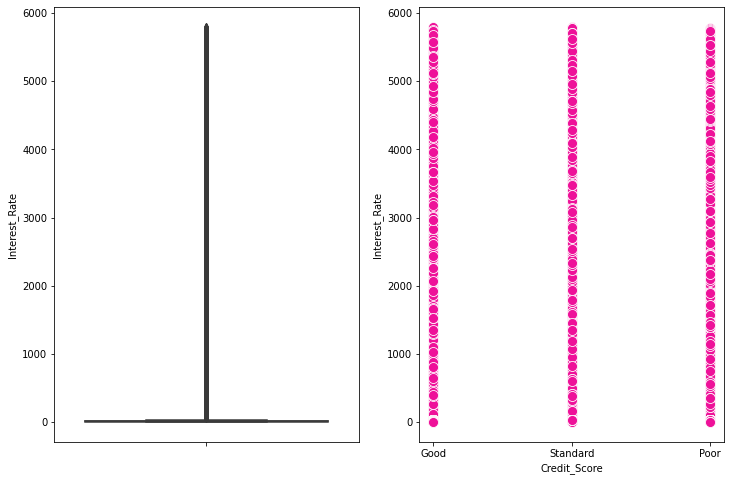

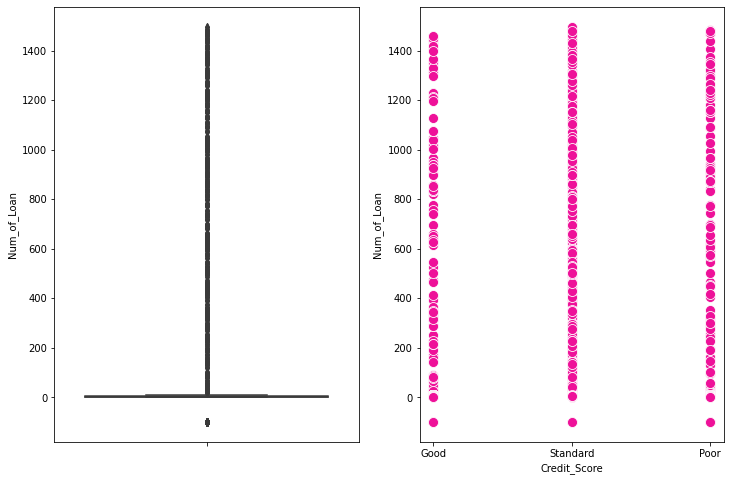

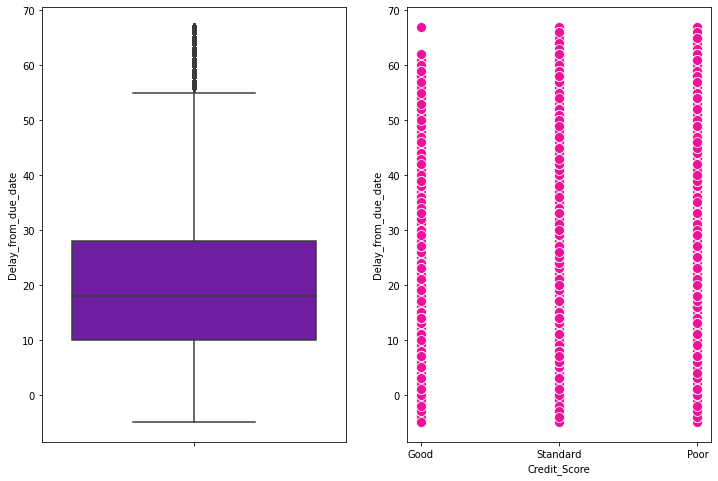

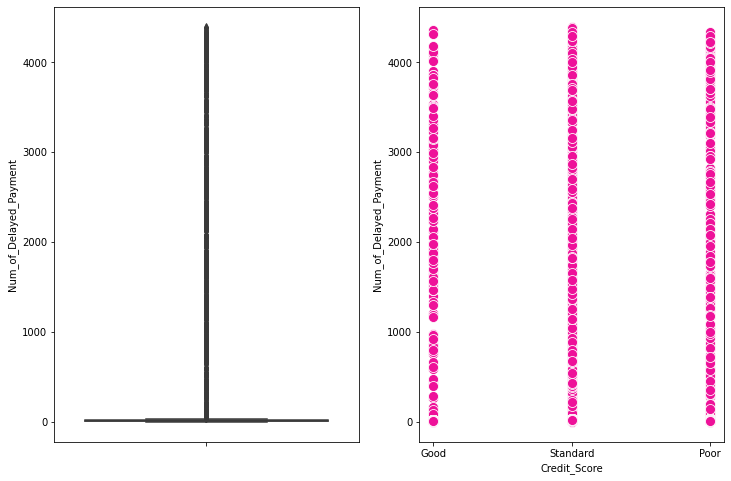

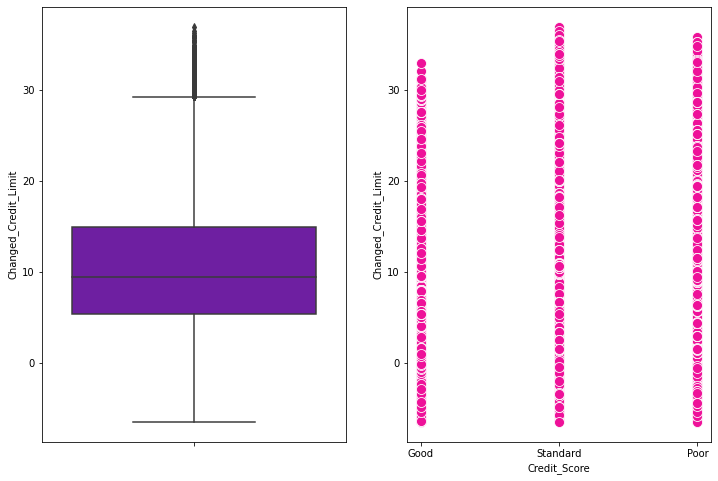

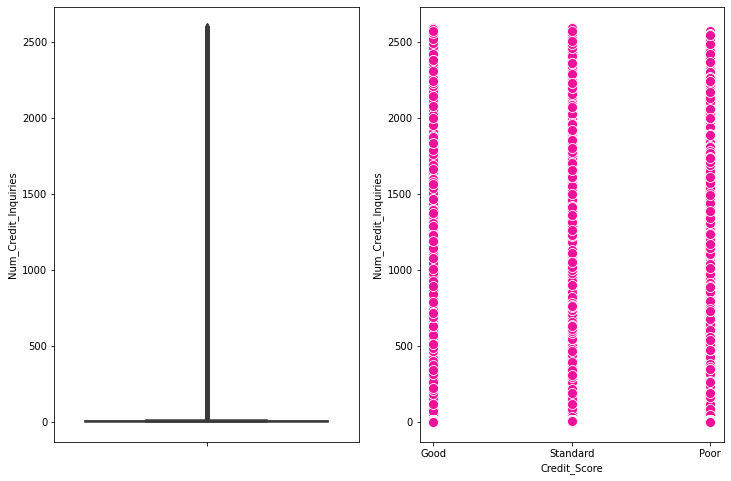

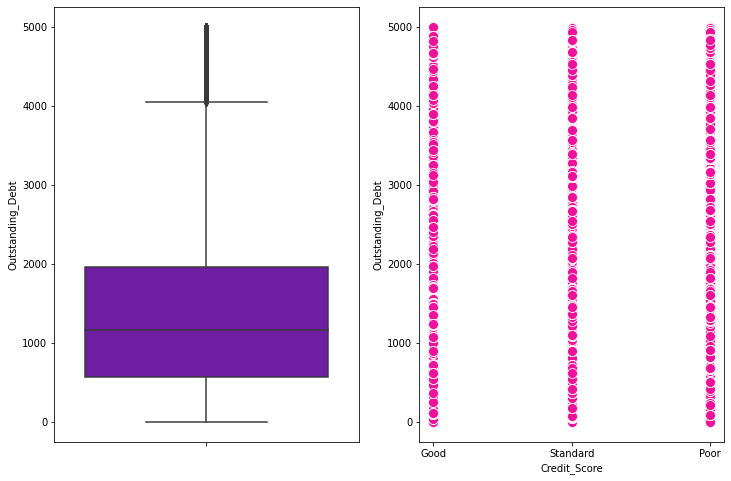

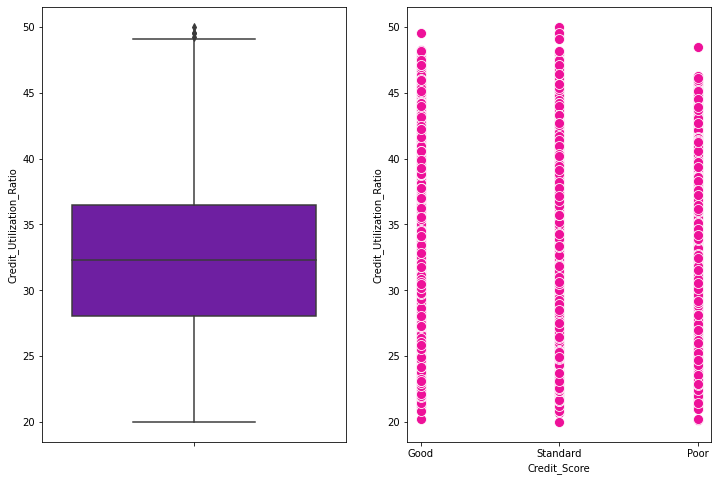

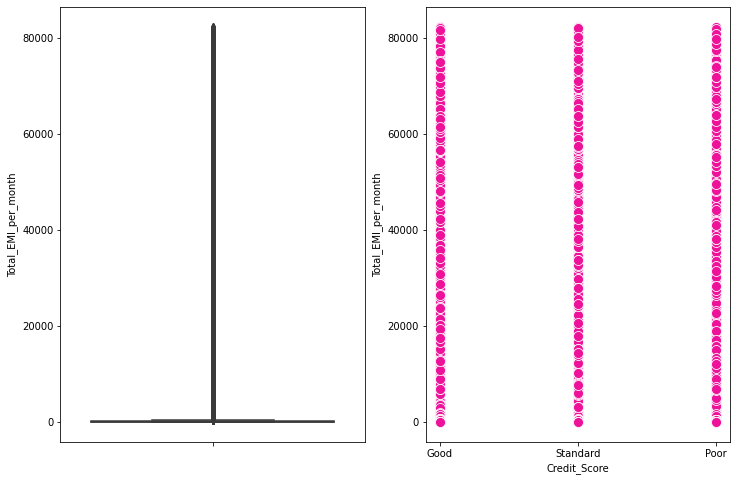

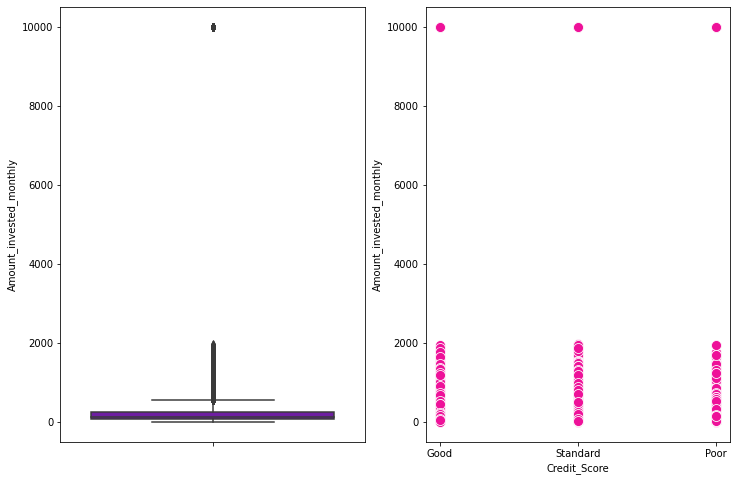

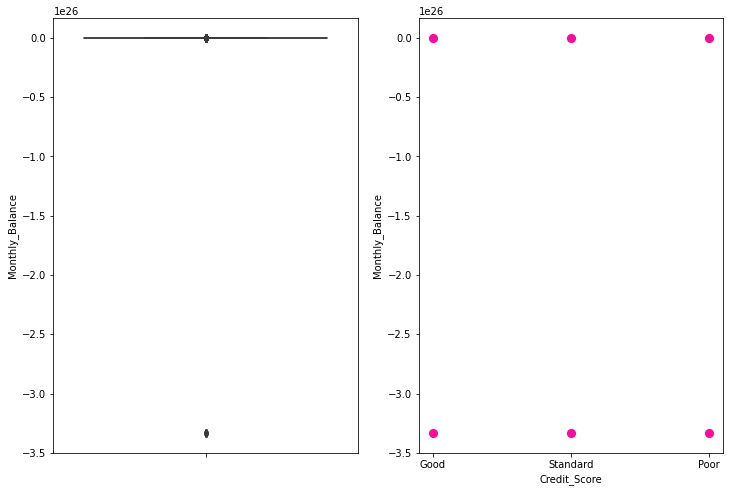

In [37]:
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0], color='#7209b7')
    sns.scatterplot(data=data,x = 'Credit_Score', s = 100, y=col, ax=ax[1], color ='#ee1199')
    plt.show()

## Handle Age Outliers  Values

In [38]:
((data['Age'] <= 100) & (data['Age'] >= 0)).value_counts()

True     94815
False     2699
Name: Age, dtype: int64

In [39]:
data = data[(data['Age'] <= 100) & (data['Age'] >= 0)]

## Handle Annual_Income Outliers  Values

In [40]:
(data['Annual_Income'] <= 300000).value_counts()

True     93873
False      942
Name: Annual_Income, dtype: int64

In [41]:
data = data[(data['Annual_Income'] <= 300000)]

## Handle Monthly_Inhand_Salary Outliers  Values

In [42]:
(data['Monthly_Inhand_Salary'] <= 15000).value_counts()

True     93806
False       67
Name: Monthly_Inhand_Salary, dtype: int64

In [43]:
data = data[(data['Monthly_Inhand_Salary'] <= 15000)]

## Handle Num_Bank_Accounts Outliers Values

In [44]:
(data['Num_Bank_Accounts'] <= 750).value_counts()

True     93082
False      724
Name: Num_Bank_Accounts, dtype: int64

In [45]:
data = data[(data['Num_Bank_Accounts'] <= 750)]

## Handle Num_Credit_Card Outliers  Values

In [46]:
(data['Num_Credit_Card'] <= 1000).value_counts()

True     92367
False      715
Name: Num_Credit_Card, dtype: int64

In [47]:
data = data[(data['Num_Credit_Card'] <= 1000)]

## Handle Interest_Rate Outliers  Values

In [48]:
(data['Interest_Rate'] <= 5000).value_counts()

True     92124
False      243
Name: Interest_Rate, dtype: int64

In [49]:
data = data[(data['Interest_Rate'] <= 5000)]

## Handle Num_of_Loan Outliers  Values

In [50]:
(data['Num_of_Loan'] <= 1100).value_counts()

True     92003
False      121
Name: Num_of_Loan, dtype: int64

In [51]:
data = data[(data['Num_of_Loan'] <= 1100)]

## Handle Delay_from_due_date Outliers Values

In [52]:
(data['Delay_from_due_date'] <= 65).value_counts()

True     91952
False       51
Name: Delay_from_due_date, dtype: int64

In [53]:
data = data[(data['Delay_from_due_date'] <= 65)]

## Handle Num_of_Delayed_Payment Outliers  Values

In [54]:
(data['Num_of_Delayed_Payment'] <= 1000).value_counts()

True     91378
False      574
Name: Num_of_Delayed_Payment, dtype: int64

In [55]:
data = data[(data['Num_of_Delayed_Payment'] <= 1000)]

## Handle Changed_Credit_Limit Outliers  Values

In [56]:
(data['Changed_Credit_Limit'] <= 30).value_counts()

True     91133
False      245
Name: Changed_Credit_Limit, dtype: int64

In [57]:
data = data[(data['Changed_Credit_Limit'] <= 30)]

## Handle Num_Credit_Inquiries Outliers  Values

In [58]:
(data['Num_Credit_Inquiries'] <= 2400).value_counts()

True     91035
False       98
Name: Num_Credit_Inquiries, dtype: int64

In [59]:
data = data[(data['Num_Credit_Inquiries'] <= 2400)]

## Handle Outstanding_Debt Outliers  Values

In [60]:
(data['Outstanding_Debt'] <= 4950).value_counts()

True     90749
False      286
Name: Outstanding_Debt, dtype: int64

In [61]:
data = data[(data['Outstanding_Debt'] <= 4950)]

## Handle Credit_Utilization_Ratio Outliers  Values

In [62]:
(data['Credit_Utilization_Ratio'] <= 45).value_counts()

True     90617
False      132
Name: Credit_Utilization_Ratio, dtype: int64

In [63]:
data = data[(data['Credit_Utilization_Ratio'] <= 45)]

## Handle Total_EMI_per_month Outliers  Values

In [64]:
(data['Total_EMI_per_month'] <= 75000).value_counts()

True     90374
False      243
Name: Total_EMI_per_month, dtype: int64

In [65]:
data = data[(data['Total_EMI_per_month'] <= 75000)]

## Handle Amount_invested_monthly Outliers  Values

In [66]:
(data['Amount_invested_monthly'] <= 9000).value_counts()

True     86337
False     4037
Name: Amount_invested_monthly, dtype: int64

## Amount_invested_monthly outliers ignored over 10% of data

## Handle Monthly_Balance Outliers  Values

In [67]:
(data['Monthly_Balance'] > -1).value_counts()

True     90365
False        9
Name: Monthly_Balance, dtype: int64

In [68]:
data = data[(data['Monthly_Balance'] > -1)]

# Encode categorical values

In [69]:
data.select_dtypes(['object']).columns

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [70]:
Month_le = le()
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

In [71]:
data['Month'] = Month_le.fit_transform(data['Month'])
data['Occupation'] = Occupation_le.fit_transform(data['Occupation'])
data['Type_of_Loan'] = Type_of_Loan_le.fit_transform(data['Type_of_Loan'])
data['Credit_Mix'] = Credit_Mix_le.fit_transform(data['Credit_Mix'])
data['Credit_History_Age'] = Credit_History_Age_le.fit_transform(data['Credit_History_Age'])
data['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(data['Payment_Behaviour'])
data['Credit_Score'] = Credit_Score_le.fit_transform(data['Credit_Score'])

# Correlation

<AxesSubplot:>

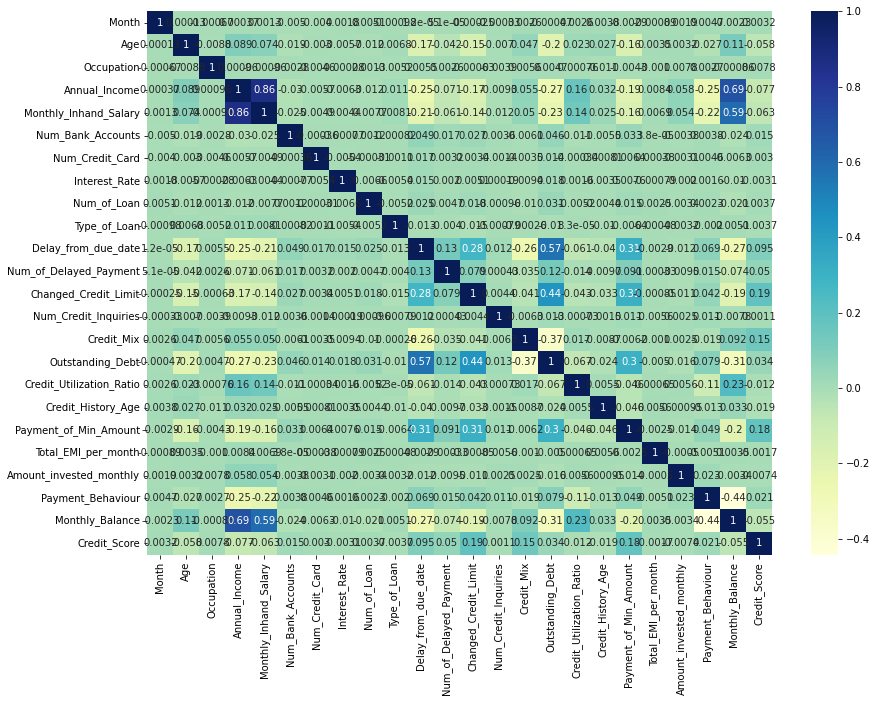

In [72]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr() , annot = True , cmap = "YlGnBu")

# Feature Selection

In [73]:
round(abs(data.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Changed_Credit_Limit         18.55
Payment_of_Min_Amount        17.93
Credit_Mix                   14.70
Delay_from_due_date           9.54
Annual_Income                 7.70
Monthly_Inhand_Salary         6.33
Age                           5.78
Monthly_Balance               5.47
Num_of_Delayed_Payment        5.02
Outstanding_Debt              3.36
Payment_Behaviour             2.07
Credit_History_Age            1.90
Num_Bank_Accounts             1.46
Credit_Utilization_Ratio      1.23
Occupation                    0.78
Amount_invested_monthly       0.74
Type_of_Loan                  0.37
Num_of_Loan                   0.37
Month                         0.32
Interest_Rate                 0.31
Num_Credit_Card               0.30
Total_EMI_per_month           0.17
Num_Credit_Inquiries          0.11
Name: Credit_Score, dtype: float64

<AxesSubplot:>

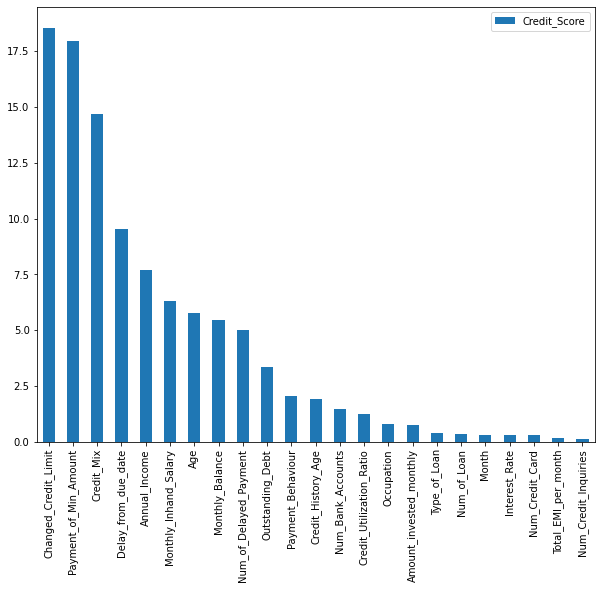

In [74]:
pd.DataFrame(abs(data.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [75]:
mdf = data[['Credit_Score','Changed_Credit_Limit', 'Payment_of_Min_Amount', 'Credit_Mix', 'Delay_from_due_date', 'Annual_Income', 'Monthly_Inhand_Salary', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Payment_Behaviour', 'Credit_History_Age', 'Num_Bank_Accounts', 'Credit_Utilization_Ratio']]

# Modeling

In [76]:
x = mdf.drop(['Credit_Score'] , axis = 1).values
y = mdf['Credit_Score' ].values

# Split Data

In [77]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)
[x_train.shape, y_train.shape]

[(67773, 14), (67773,)]

# Data Scaling using Robust Scaler

In [78]:
ro_scaler = rbScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

[(67773, 14), (22592, 14)]

# Logistic Regression

In [79]:
lgr = lgrClassifier(C = 100)

In [80]:
lgr.fit(x_train , y_train)

LogisticRegression(C=100)

In [81]:
lgr_score = lgr.score(x_train , y_train)

In [82]:
lgr_score_t = lgr.score(x_test , y_test)

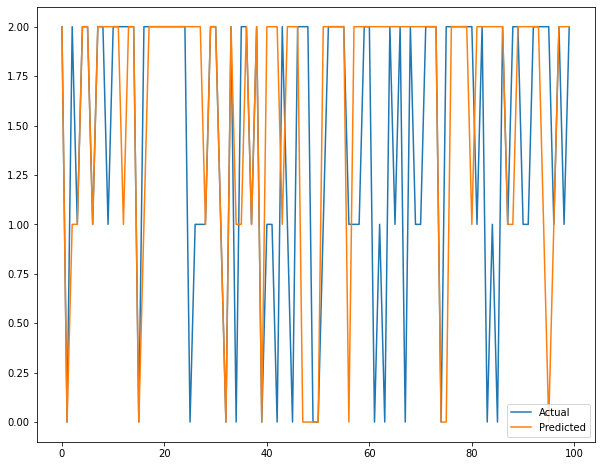

In [83]:
y_pred1 = lgr.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred1": y_pred1})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# KNN

In [84]:
knn = knnClassifier(n_neighbors=5)

In [85]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [86]:
knn_score = knn.score(x_train , y_train)

In [87]:
knn_score_t = knn.score(x_test , y_test)

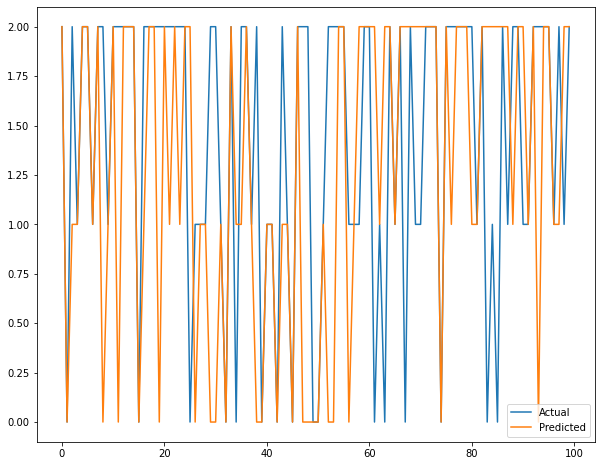

In [88]:
y_pred2 = knn.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred2": y_pred2})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# Decision Tree Classifier

In [89]:
dt = dtClassifier(max_features=14, max_depth=8)

In [90]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=8, max_features=14)

In [91]:
dt_score = dt.score(x_train , y_train)

In [92]:
dt_score_t = dt.score(x_test , y_test)

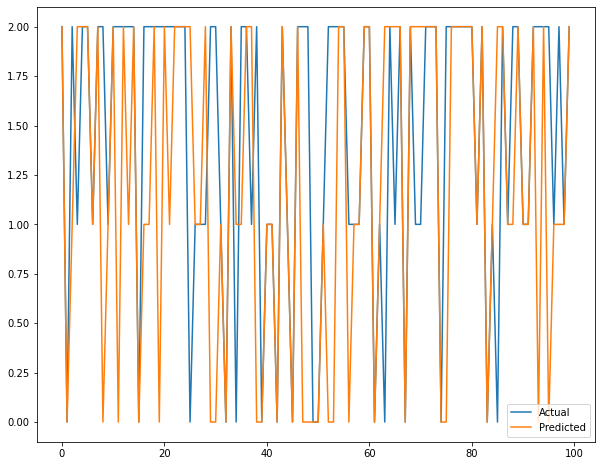

In [93]:
y_pred3 = dt.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred3": y_pred3})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# Random Forest Classifier

In [94]:
rf = rfClassifier(max_features= 14, max_depth= 8)

In [95]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=8, max_features=14)

In [96]:
rf_score = rf.score(x_train , y_train)

In [97]:
rf_score_t = rf.score(x_test , y_test)

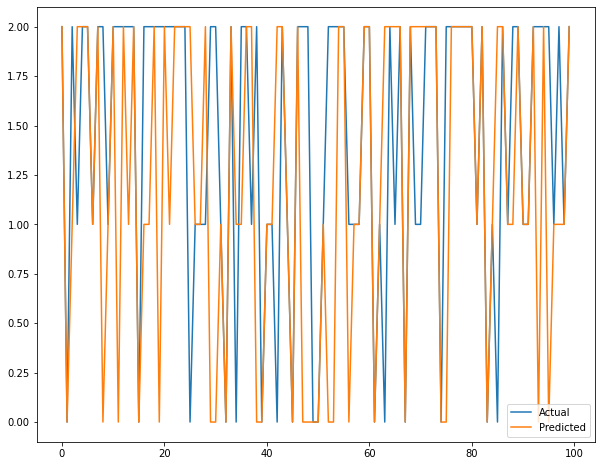

In [98]:
y_pred4 = rf.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred4": y_pred4})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# XGBoost

In [99]:
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'multi:softmax' , n_estimators= 5, random_state=42)

In [100]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, objective='multi:softmax', predictor='auto',
              random_state=42, reg_alpha=0, ...)

In [101]:
xgb_score = xgb.score(x_train , y_train)

In [102]:
xgb_score_t = xgb.score(x_test , y_test)

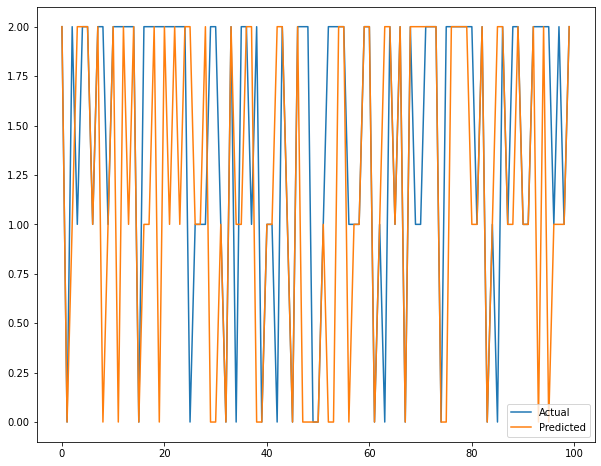

In [103]:
y_pred5 = xgb.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred5": y_pred5})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# AdaBoost

In [104]:
ada = adabClassifier(n_estimators=5, learning_rate=0.2)

In [105]:
ada.fit(x_train , y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=5)

In [106]:
ada_score = ada.score(x_train , y_train )

In [107]:
ada_score_t = ada.score(x_test , y_test)

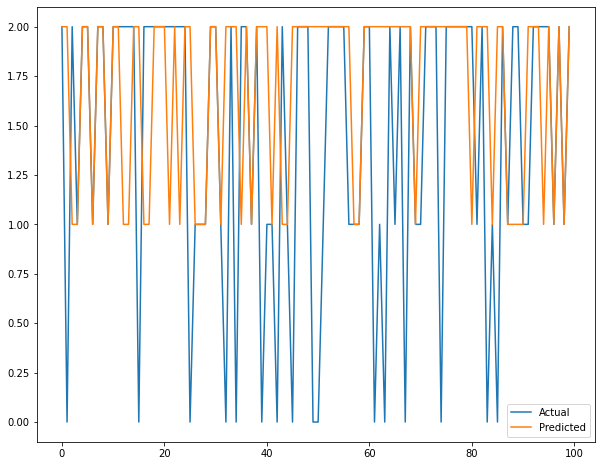

In [108]:
y_pred6 = ada.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred6": y_pred6})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# Voting

In [109]:
clf1 = lgrClassifier()
clf2 = knnClassifier(n_neighbors=4)
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.2, objective = 'multi:softmax' , n_estimators= 5, random_state=42)
clf4 = rfClassifier(n_estimators=3 , max_depth=6  , max_features=4)

In [110]:
v_clf = voClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf3) ,("RandomForestClassifier" , clf4)] , voting = "hard")

In [111]:
v_clf.fit(x_train , y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=4)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,

In [112]:
v_clf_score = v_clf.score(x_train , y_train)

In [113]:
v_clf_score_t = v_clf.score(x_test , y_test)

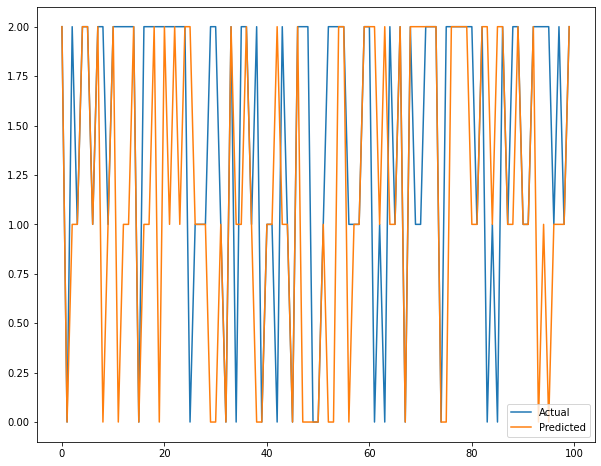

In [114]:
y_pred7 = v_clf.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred7": y_pred7})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# GBM

In [115]:
gbm = gbClassifier(n_estimators=100, learning_rate=0.2, random_state=42, max_depth = 5)

In [116]:
gbm.fit(x_train , y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, random_state=42)

In [117]:
gbm_score = gbm.score(x_train , y_train)

In [118]:
gbm_score_t = gbm.score(x_test , y_test)

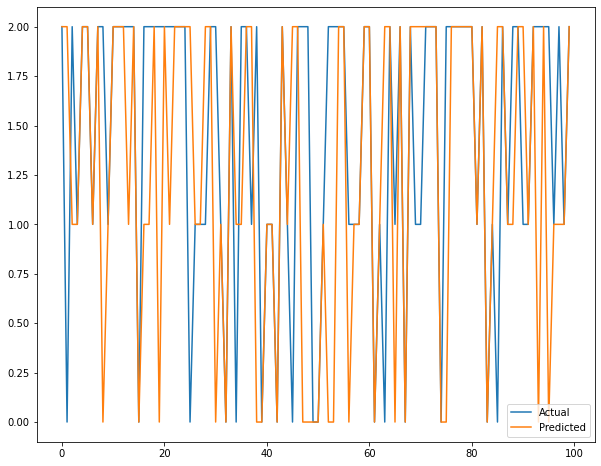

In [119]:
y_pred8 = gbm.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred8": y_pred8})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# Lightt GBM

In [120]:
lgbm = lgbClassifier(objective='multiclass', n_estimators=100, learning_rate=0.2, random_state=42, max_depth = 5)

In [121]:
lgbm.fit(x_train , y_train)

LGBMClassifier(learning_rate=0.2, max_depth=5, objective='multiclass',
               random_state=42)

In [122]:
lgbm_score = gbm.score(x_train , y_train)

In [123]:
lgbm_score_t = lgbm.score(x_test , y_test)

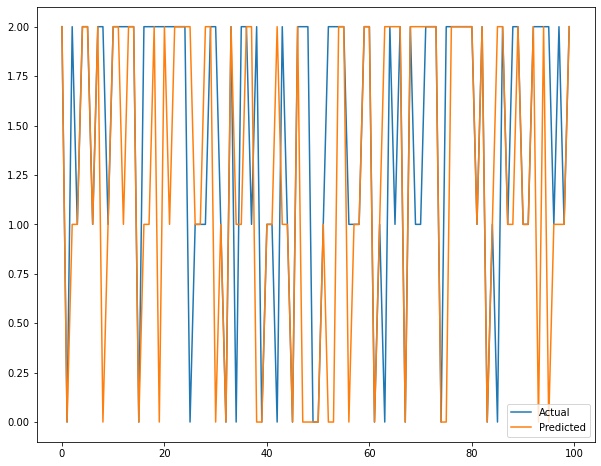

In [124]:
y_pred9 = lgbm.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred9": y_pred9})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# CatBoostClassifier

In [125]:
cb = cbClassifier(iterations=500, learning_rate=0.2)

In [126]:
cb.fit(x_train , y_train)

0:	learn: 0.9797798	total: 94.9ms	remaining: 47.3s
1:	learn: 0.9044877	total: 124ms	remaining: 30.8s
2:	learn: 0.8556144	total: 152ms	remaining: 25.1s
3:	learn: 0.8174973	total: 184ms	remaining: 22.8s
4:	learn: 0.7914752	total: 213ms	remaining: 21.1s
5:	learn: 0.7718225	total: 245ms	remaining: 20.2s
6:	learn: 0.7577373	total: 274ms	remaining: 19.3s
7:	learn: 0.7469541	total: 309ms	remaining: 19s
8:	learn: 0.7372304	total: 340ms	remaining: 18.5s
9:	learn: 0.7294417	total: 371ms	remaining: 18.2s
10:	learn: 0.7246474	total: 403ms	remaining: 17.9s
11:	learn: 0.7206832	total: 431ms	remaining: 17.5s
12:	learn: 0.7179022	total: 456ms	remaining: 17.1s
13:	learn: 0.7155040	total: 483ms	remaining: 16.8s
14:	learn: 0.7125173	total: 517ms	remaining: 16.7s
15:	learn: 0.7101939	total: 548ms	remaining: 16.6s
16:	learn: 0.7085529	total: 578ms	remaining: 16.4s
17:	learn: 0.7072652	total: 606ms	remaining: 16.2s
18:	learn: 0.7062788	total: 633ms	remaining: 16s
19:	learn: 0.7047871	total: 661ms	remaining:

In [127]:
cb_score = cb.score(x_train , y_train)

In [128]:
cb_score_t = cb.score(x_test , y_test)

In [129]:
y_pred10 = cb.predict(x_test)
y_pred10 = np.array(y_pred10.flatten('F').tolist())

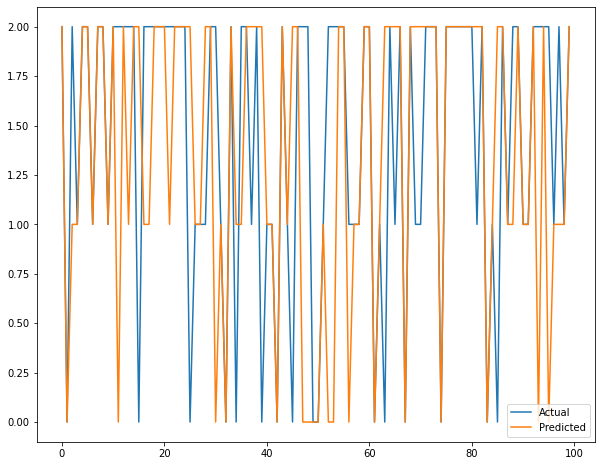

In [130]:
dd = pd.DataFrame({"Y_test" : y_test , "y_pred10": y_pred10})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# Comparison

In [131]:
models = ['logistic regression', 'knn', 'decision tree', 'random forest', 'xgboosting', 'adaboosting', 'voting', 'gbm', 'light gbm', 'catboosting']
data = [[lgr_score, lgr_score_t],[knn_score, knn_score_t],[dt_score, dt_score_t],[rf_score, rf_score_t],[xgb_score, xgb_score_t],
        [ada_score, ada_score_t],[v_clf_score, v_clf_score_t],[gbm_score, gbm_score_t],[lgbm_score, lgbm_score_t],[cb_score, cb_score_t]]
cols = ["Train Score", 'Test Score']
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ['Train Score'])

,Train Score,Test Score
catboosting,0.769746,0.702727
knn,0.764538,0.649920
gbm,0.763667,0.689359
light gbm,0.763667,0.698079
random forest,0.706240,0.681347
voting,0.705709,0.679488
decision tree,0.699630,0.677231
xgboosting,0.688608,0.679710
logistic regression,0.603072,0.602204
adaboosting,0.600313,0.598398
